In [1]:
import astropy.coordinates as astro_coord
#imports
import astropy.units as u
import numpy as np
import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic
from astropy.coordinates import SkyCoord, Distance
#import popsims
import matplotlib.pyplot as plt
#%matplotlib notebook
from tqdm import tqdm
from astropy.constants import G
from gala.units import galactic
import gala.coordinates as gc
import  h5py
import imageio
import matplotlib as mpl
import astropy.coordinates as coord
import seaborn as sns
sns.set_style("dark")
mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 
font = {#'family' : 'Helvetica',
        'size'   : 16}

In [2]:
#coords standards
_ = astro_coord.galactocentric_frame_defaults.set('v4.0')

#potential and hamiltonian
pot=gp.MilkyWayPotential()
H = gp.Hamiltonian(pot)

#galactocentric reference frame
v_sun = astro_coord.CartesianDifferential([11.1, 220 + 24.0, 7.25]*u.km/u.s)

galcen_frame =astro_coord.Galactocentric(galcen_distance=8.1*u.kpc,
                                    galcen_v_sun=v_sun)


In [3]:
c= astro_coord.ICRS(ra=229.0264*u.degree,dec=-0.1368*u.degree,
                  distance=22.5*u.kpc,
                  pm_ra_cosdec=-2.21*u.mas/u.yr,
                  pm_dec=-2.23*u.mas/u.yr,
                  radial_velocity=-56.2*u.km/u.s)

cg= c.transform_to(galcen_frame)
cg.representation_type= 'cartesian'

In [4]:
cg.cartesian.xyz.to(u.kpc)

<Quantity [ 7.6147012 ,  0.22665035, 16.12196875] kpc>

In [5]:
cg

<Galactocentric Coordinate (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.1 kpc, galcen_v_sun=(11.1, 244., 7.25) km / s, z_sun=20.8 pc, roll=0.0 deg): (x, y, z) in kpc
    (7.6147012, 0.22665035, 16.12196875)
 (v_x, v_y, v_z) in km / s
    (-38.66308113, -90.93643314, -18.00132951)>

In [68]:
st_pos= gd.PhaseSpacePosition(cg)
mstream=5e4

In [69]:
 df = ms.FardalStreamDF()
prog_mass =    mstream * u.Msun

gen = ms.MockStreamGenerator(df, H)

time_dict={'dt':-10*u.Myr, 't1':0.*u.Myr, 't2':-3*u.Gyr}

mock_st, cent=gen.run( st_pos, prog_mass, **time_dict, nbody=None,  n_particles=1, progress=True)


Integrating orbits:  100%

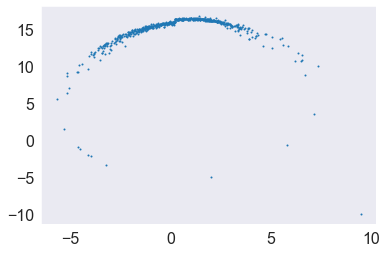

In [77]:
fig, ax=plt.subplots()

ax.scatter(mock_st.y, mock_st.z, s=1)

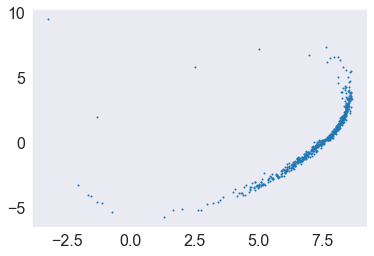

In [78]:
fig, ax=plt.subplots()

ax.scatter(mock_st.x, mock_st.y, s=1)

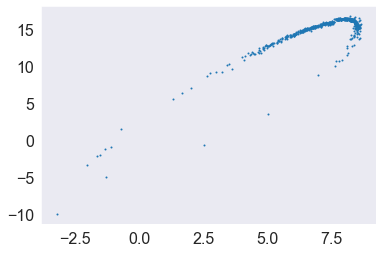

In [79]:
fig, ax=plt.subplots()

ax.scatter(mock_st.x, mock_st.z, s=1)

In [65]:
s=SkyCoord(mock_st.pos)

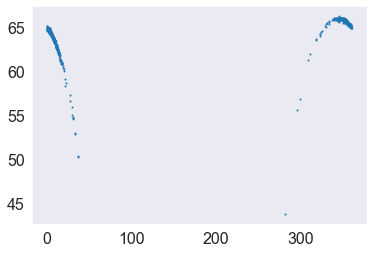

In [66]:
fig, ax=plt.subplots()
ax.scatter(s.ra, s.dec, s=1)